# COMP 6321 Machine Learning Project

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree        # For DecisionTreeClassifier class
import sklearn.ensemble    # For RandomForestClassifier class
import sklearn.datasets    # For make_circles
import sklearn.metrics     # For accuracy_score
import pandas as pd
import glob

In [3]:
# Random Forest simple training and evaluation code
def randomForestSimple (X_train, y_train, X_test):
    rfc=sklearn.ensemble.RandomForestClassifier(random_state=0)
    rfc.fit(X_train, y_train)
    z_train=rfc.predict(X_train)
    z_test=rfc.predict(X_test)
    return sklearn.metrics.accuracy_score(y_train, z_train)*100, sklearn.metrics.accuracy_score(y_test, z_test)*100

In [4]:
# Random Forest training and evaluation code
def randomForestsTrainEval (X_train, y_train, X_test):
    a_train=np.ndarray((9,11))
    a_test=np.ndarray((9,11))
    for i in range(9):
        for j in range(11):
            rfc=sklearn.ensemble.RandomForestClassifier(random_state=0, n_estimators=2**j, max_depth=i+1)
            rfc.fit(X_train, y_train)
            z_train=rfc.predict(X_train)
            z_test=rfc.predict(X_test)
            a_train[i,j]=sklearn.metrics.accuracy_score(y_train, z_train)
            a_test[i,j]=sklearn.metrics.accuracy_score(y_test, z_test)
    return a_train, a_test

In [5]:
# Random Forest plotting code
def plotAccuracy (a_train, a_test):
    for a in [a_train, a_test]:
        plt.imshow(a, interpolation='nearest', origin='lower')
        plt.title("Accuracy on "+str(("testing", "training")[np.array_equal(a,a_train)])+" data")
        plt.colorbar()
        plt.xlabel('n_estimators')
        plt.ylabel('max_depth')
        plt.xticks(range(11), 2**np.arange(11))
        plt.yticks(range(9), np.arange(9)+1)
        plt.show()

In [6]:
# Ada Boost simple training and evaluation code
def adaBoostSimple (X_train, y_train, X_test):
    abc=sklearn.ensemble.AdaBoostClassifier(random_state=0,algorithm='SAMME.R')
    abc.fit(X_train, y_train)
    z_train=abc.predict(X_train)
    z_test=abc.predict(X_test)
    return sklearn.metrics.accuracy_score(y_train, z_train)*100, sklearn.metrics.accuracy_score(y_test, z_test)*100

In [7]:
# Ada Boost training and evaluation code
def adaBoostTrainEval (X_train, y_train, X_test):
    a_train=np.ndarray((10))
    a_test=np.ndarray((10))
    for i in range(10):
        abc=sklearn.ensemble.AdaBoostClassifier(random_state=0,algorithm='SAMME.R',n_estimators=(i+1)*10)
        abc.fit(X_train, y_train)
        z_train=abc.predict(X_train)
        z_test=abc.predict(X_test)
        a_train[i]=sklearn.metrics.accuracy_score(y_train, z_train)
        a_test[i]=sklearn.metrics.accuracy_score(y_test, z_test)
    return a_train, a_test

In [8]:
# Ada Boost plotting code
def lineAccuracy (a_train, a_test):
    R=np.arange(10, 110, 10)
    plt.plot (R, a_train, label='train accuracy')
    plt.plot (R, a_test, label='test accuracy')
    plt.title ("training accuracy of successive boosting rounds")
    plt.xlabel('R')
    plt.ylabel('percent accuracy')
    plt.ylim(0, 110)
    plt.show()

# Random Forests and Ada Boost (Occupancy dataset)

In [9]:
# Loading code
R=np.loadtxt('../../datasets/1_occupancy/occupancy_data/datatraining.txt', delimiter=',', skiprows=1, usecols = (2,3,4,5,6,7))
X_train=R[:, 0:5]
y_train=R[:, 5].astype(np.int32)
T=np.loadtxt('../../datasets/1_occupancy/occupancy_data/datatest.txt', delimiter=',', skiprows=1, usecols = (2,3,4,5,6,7))
X_test=T[:, 0:5]
y_test=T[:, 5].astype(np.int32)

In [10]:
# Simple training and evaluation code
acc_train, acc_test = randomForestSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

100.0
94.93433395872421


In [11]:
# Training and evaluation code
a_train, a_test=randomForestsTrainEval (X_train, y_train, X_test)

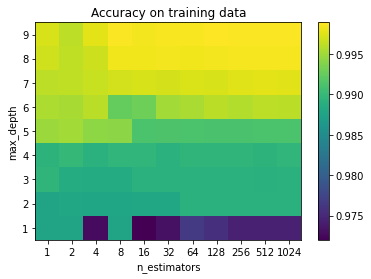

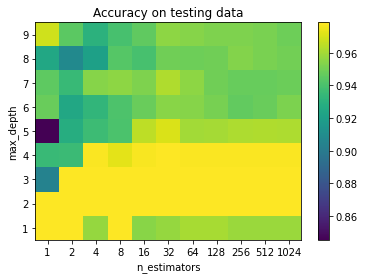

In [12]:
# Plotting code
plotAccuracy (a_train, a_test)

In [13]:
# Simple training and evaluation code
acc_train, acc_test = adaBoostSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

99.48421957509518
97.11069418386492


In [14]:
# Training and evaluation code
a_train, a_test=adaBoostTrainEval (X_train, y_train, X_test)

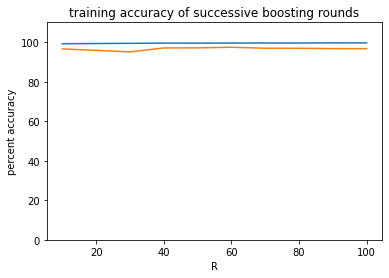

In [15]:
# Plotting code
lineAccuracy (a_train*100, a_test*100)

# Random Forests and Ada Boost (Bank Marketing dataset)

In [18]:
# Loading code
job_mapping = {'admin.':1, 'blue-collar':2, 'entrepreneur':3, 'housemaid':4, 'management':5, 'retired':6, 'self-employed':7, 'services':8, 'student':9, 'technician':10, 'unemployed':11, 'unknown':0}
boolean_mapping ={'no': 0, 'yes': 1}
marital_mapping ={'divorced':1, 'married':2, 'single':3}
education_mapping={'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'illiterate':5, 'professional.course':6, 'university.degree':7}
contact_mapping={'cellular':1, 'telephone':2}
month_mapping={'may':5, 'jun':6, 'nov':11, 'sep':9, 'jul':7, 'aug':8, 'mar':3, 'oct':10, 'apr':4, 'dec':12}
day_mapping={'fri':5, 'wed':3, 'mon':1, 'thu':4, 'tue':2}
poutcome_mapping={'nonexistent':1, 'failure':2, 'success':3}
R=pd.read_csv('../../datasets/4_bank_additional/bank-additional/bank-additional/bank-additional.csv', delimiter=';').replace(boolean_mapping).replace(job_mapping).replace(marital_mapping).replace(education_mapping).replace(contact_mapping).replace(month_mapping).replace(day_mapping).replace(poutcome_mapping).values
X_train=R[:, [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19]]
y_train=R[:, 20].astype(np.int32)
T=pd.read_csv('../../datasets/4_bank_additional/bank-additional/bank-additional/bank-additional-full.csv', delimiter=';').replace(boolean_mapping).replace(job_mapping).replace(marital_mapping).replace(education_mapping).replace(contact_mapping).replace(month_mapping).replace(day_mapping).replace(poutcome_mapping).values
X_test=T[:, [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19]]
y_test=T[:, 20].astype(np.int32)

In [19]:
# Simple training and evaluation code
acc_train, acc_test = randomForestSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

99.95144452537023
90.39283286394095


In [20]:
# Training and evaluation code
a_train, a_test=randomForestsTrainEval (X_train, y_train, X_test)

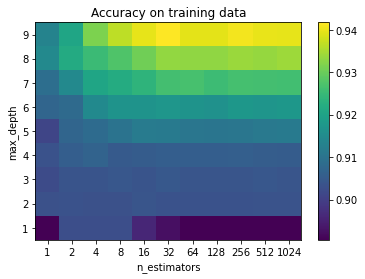

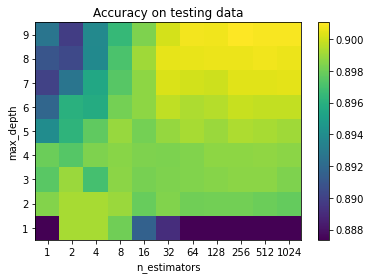

In [21]:
# Plotting code
plotAccuracy (a_train, a_test)

In [22]:
# Simple training and evaluation code
acc_train, acc_test = adaBoostSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

90.43457149793639
89.74701369330873


In [23]:
# Training and evaluation code
a_train, a_test=adaBoostTrainEval (X_train, y_train, X_test)

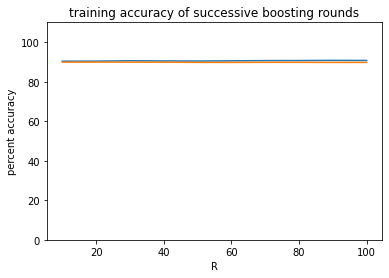

In [24]:
# Plotting code
lineAccuracy (a_train*100, a_test*100)

# Random Forests and Ada Boost (Activity Recognition dataset)

In [26]:
# Loading code
files = glob.glob("../../datasets/2_healthy_older_people/Datasets_Healthy_Older_People/datasets/S2_Dataset/d*")
Rs = [pd.read_csv(f, header=None) for f in files]
R=pd.concat(Rs,ignore_index=True).values
X_train=R[:, 1:8]
y_train=R[:, 8].astype(np.int32)
files = glob.glob("../../datasets/2_healthy_older_people/Datasets_Healthy_Older_People/datasets/S1_Dataset/d*")
Ts = [pd.read_csv(f, header=None) for f in files]
T=pd.concat(Ts,ignore_index=True).values
X_test=T[:, 1:8]
y_test=T[:, 8].astype(np.int32)

In [27]:
# Simple training and evaluation code
acc_train, acc_test = randomForestSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

100.0
65.35193018558743


In [28]:
# Training and evaluation code
a_train, a_test=randomForestsTrainEval (X_train, y_train, X_test)

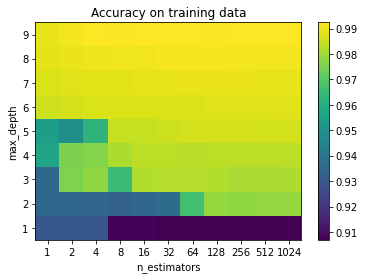

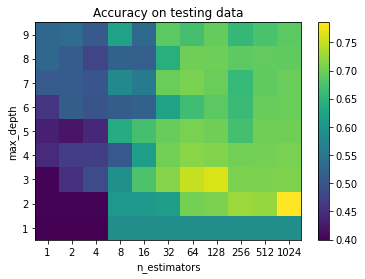

In [29]:
# Plotting code
plotAccuracy (a_train, a_test)

In [30]:
# Simple training and evaluation code
acc_train, acc_test = adaBoostSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

82.32358915481763
13.88094965893068


In [31]:
# Training and evaluation code
a_train, a_test=adaBoostTrainEval (X_train, y_train, X_test)

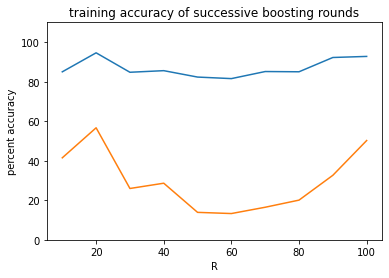

In [32]:
# Plotting code
lineAccuracy (a_train*100, a_test*100)

# Random Forests and Ada Boost (Bitcoin Ransomeware dataset)

In [34]:
# Loading code
nrows=100000
nparts=10
ntest=nrows//nparts
label_mapping = {'princetonCerber':1, 'princetonLocky':1, 'montrealCryptoLocker':1,
 'montrealCryptXXX':1, 'paduaCryptoWall':1, 'montrealWannaCry':1,
 'montrealDMALockerv3':1, 'montrealCryptoTorLocker2015':1, 'montrealSamSam':1,
 'montrealFlyper':1, 'montrealNoobCrypt':1, 'montrealDMALocker':1, 'montrealGlobe':1,
 'montrealEDA2':1, 'paduaKeRanger':1, 'montrealVenusLocker':1, 'montrealXTPLocker':1,
 'paduaJigsaw':1, 'montrealGlobev3':1, 'montrealJigSaw':1, 'montrealXLockerv5.0':1,
 'montrealXLocker':1, 'montrealRazy':1, 'montrealCryptConsole':1,
 'montrealGlobeImposter':1, 'montrealSam':1, 'montrealComradeCircle':1,
 'montrealAPT':1, 'white':0}
R=pd.read_csv('../../datasets/3_bitcoin_heist_ransonware_address/data/BitcoinHeistData.csv', nrows=nrows, usecols=["year","day","length","weight","count","looped","neighbors","income","label"]).replace(label_mapping).values
np.random.seed(0)
np.random.shuffle(R)
X_train=R[:ntest, 0:8]
y_train=R[:ntest, 8].astype(np.int32)
X_test=R[ntest:, 0:8]
y_test=R[ntest:, 8].astype(np.int32)

In [35]:
# Simple training and evaluation code
acc_train, acc_test = randomForestSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

100.0
100.0


In [36]:
# Training and evaluation code
a_train, a_test=randomForestsTrainEval (X_train, y_train, X_test)

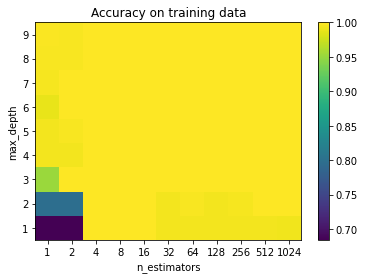

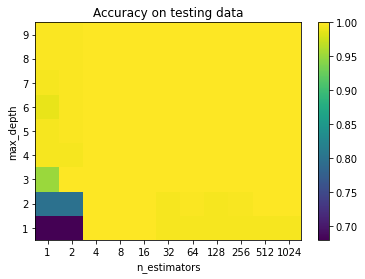

In [37]:
# Plotting code
plotAccuracy (a_train, a_test)

In [38]:
# Simple training and evaluation code
acc_train, acc_test = adaBoostSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

100.0
100.0


In [39]:
# Training and evaluation code
a_train, a_test=adaBoostTrainEval (X_train, y_train, X_test)

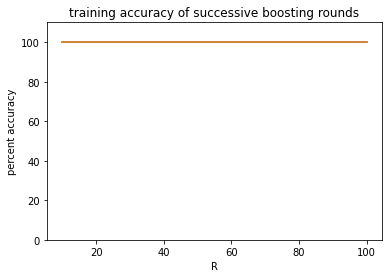

In [40]:
# Plotting code
lineAccuracy (a_train*100, a_test*100)

# Random Forests and Ada Boost (Montreal Crime dataset)

In [41]:
# Loading code
category_mapping = {'Introduction':1, 'Vol dans / sur véhicule à moteur':2, 'Vol de véhicule à moteur':3, 'Méfait':4, 'Vol qualifié':5, 'Infraction entraînant la mort':6, 'Vols qualifiés':5, 'Infractions entrainant la mort':6}
shift_mapping ={'jour':1, 'soir':2, 'nuit':3}
TR=pd.read_csv('../../datasets/5_interventionscitoyendo/interventionscitoyendo.csv', encoding='latin1').replace(category_mapping).replace(shift_mapping)
TR['YEAR']=TR.DATE.str.split('-').str[0].astype(np.int32)
TR['MONTH']=TR.DATE.str.split('-').str[1].astype(np.int32)
TR['DAY']=TR.DATE.str.split('-').str[2].astype(np.int32)
TR.dropna(inplace=True)
R_train=TR.loc[TR['YEAR'] == 2018].values
X_train=R_train[:, [2,3,4,5,6,7,9,10]]
y_train=R_train[:, 0].astype(np.int32)
R_test=TR.loc[TR['YEAR'] == 2019].values
X_test=R_test[:, [2,3,4,5,6,7,9,10]]
y_test=R_test[:, 0].astype(np.int32)

In [42]:
# Simple training and evaluation code
acc_train, acc_test = randomForestSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

97.75241316141759
34.62714048978089


In [43]:
# Training and evaluation code
a_train, a_test=randomForestsTrainEval (X_train, y_train, X_test)

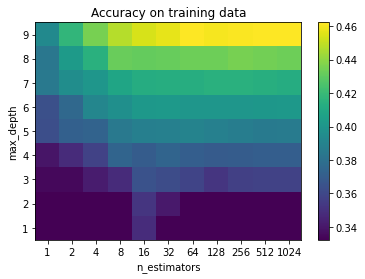

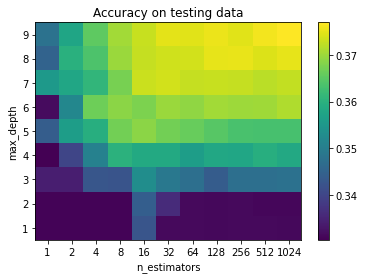

In [44]:
# Plotting code
plotAccuracy (a_train, a_test)

In [45]:
# Simple training and evaluation code
acc_train, acc_test = adaBoostSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

36.35595011625449
34.531393850119684


In [46]:
# Training and evaluation code
a_train, a_test=adaBoostTrainEval (X_train, y_train, X_test)

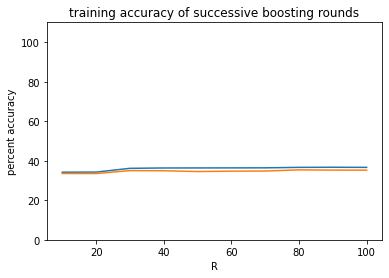

In [47]:
# Plotting code
lineAccuracy (a_train*100, a_test*100)